In [1]:
# Importing the libraries
import numpy as np
from TFBT import TFBT
import sklearn.datasets as dts
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
#%% importing the dataset
X, y = dts.load_wine(return_X_y=True)

In [4]:
#Training the model
K = 2
N = 3

err = np.zeros((K, N))

kfold = StratifiedKFold(n_splits=K, shuffle=True)

for k, (train_index, test_index) in enumerate(kfold.split(X, y)):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for i in range(1, N + 1):

        tfbt = TFBT(n_batches_per_layer=1,
                    label_vocabulary=None,
                    n_trees=1,
                    max_depth=5,
                    learning_rate=0.1,
                    step=i,
                    model_dir=None)
        pipe_tfbt = Pipeline([("scaler", StandardScaler()), ("clf", tfbt)])
        pipe_tfbt.fit(x_train, y_train)

ng local_init_op.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Sami\AppData\Local\Temp\tmpd6zmsq_r\model.ckpt.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Sami\AppData\Local\Temp\tmpd6zmsq_r\model.ckpt.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in Coll

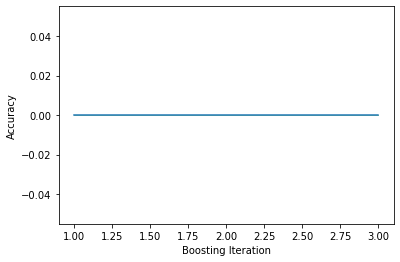

In [6]:
n = range(1, N + 1)
mean_err = np.mean(err, axis=0)
std_err = np.std(err, axis=0)


plt.plot(n, mean_err)
plt.fill_between(n, mean_err - std_err, mean_err +
                 std_err, color="tab:green", alpha=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Boosting Iteration")
plt.show()